In [300]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import classification_report, accuracy_score, f1_score

In [345]:
df = pd.read_csv("./modules/ml_support_modules/WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [346]:
df.shape

(1143, 13)

In [347]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

### Rename columns

In [348]:
# Adding underscore to all columns names to be possible to use dor notation
df.columns = [col.replace(" ", "_") for col in df.columns]
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [349]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [350]:
(df.shape[0] / 3) *2

762.0

In [351]:
#Split dataframe to use for simulate new data entering 
df_1 = df.iloc[:381]
df_2 =df.iloc[381:762]
df_3 = df.iloc[762:]

In [191]:
df_1.to_csv("/home/guilherme/Desktop/mlops/data/all_data/data_1.csv", index=False)
df_2.to_csv("/home/guilherme/Desktop/mlops/data/all_data/data_2.csv", index=False)
df_3.to_csv("/home/guilherme/Desktop/mlops/data/test_data/test_data.csv", index=False)

In [352]:
df_1.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [353]:
df_1.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Id
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,8.814173,0.530302,0.309764,2.622835,0.091349,14.809711,49.734908,0.997494,3.289239,0.698215,10.177428,5.632546,269.370079
std,1.947038,0.179292,0.220292,1.450722,0.055407,9.825645,32.951728,0.001767,0.157202,0.210014,1.027985,0.843795,155.937089
min,4.600000,0.180000,0.000000,1.200000,0.039000,1.000000,8.000000,0.991200,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.400000,0.400000,0.100000,1.900000,0.073000,7.000000,24.000000,0.996400,3.170000,0.560000,9.400000,5.000000,140.000000
50%,8.300000,0.520000,0.280000,2.200000,0.082000,12.000000,42.000000,0.997200,3.280000,0.640000,9.900000,6.000000,267.000000
75%,10.200000,0.630000,0.490000,2.700000,0.092000,20.000000,65.000000,0.998600,3.390000,0.780000,10.600000,6.000000,410.000000
max,15.600000,1.330000,1.000000,15.500000,0.611000,68.000000,165.000000,1.003200,3.900000,2.000000,14.000000,8.000000,536.000000


In [354]:
df_1.groupby('quality').count()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,Id
quality,,,,,,,,,,,,
3,2,2,2,2,2,2,2,2,2,2,2,2
4,13,13,13,13,13,13,13,13,13,13,13,13
5,172,172,172,172,172,172,172,172,172,172,172,172
6,138,138,138,138,138,138,138,138,138,138,138,138
7,48,48,48,48,48,48,48,48,48,48,48,48
8,8,8,8,8,8,8,8,8,8,8,8,8


<BarContainer object of 6 artists>

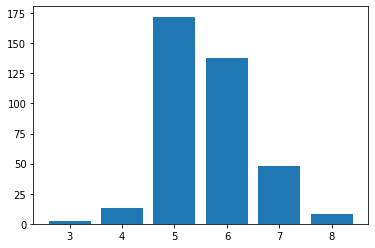

In [355]:
#unbalanced dataset
plt.bar(df_1.groupby('quality').count().index.values, 
        df_1.groupby('quality').count()['Id'].values)

In [356]:
#Creating a binary classification by grouping data into 1 if higher than 5 and 0 if not
df_1['binary_quality'] = df_1.quality > 5
#Drop Id and quality columns
df_1.drop(['Id', 'quality'], inplace=True, axis=1)

/tmp/ipykernel_3630268/615752397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['binary_quality'] = df_1.quality > 5
/tmp/ipykernel_3630268/615752397.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.drop(['Id', 'quality'], inplace=True, axis=1)


In [357]:
df_1.groupby('binary_quality').count()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
binary_quality,,,,,,,,,,,
False,187,187,187,187,187,187,187,187,187,187,187
True,194,194,194,194,194,194,194,194,194,194,194


In [358]:
# Split the model in X and y
X = df_1.drop(['binary_quality'], axis=1)
y = df_1.binary_quality

In [359]:
# train, test, validation sets
X_train, X_vali_test, y_train, y_valid_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_valid, X_test, y_valid, y_test = train_test_split(X_vali_test, y_valid_test, test_size=0.5, random_state=42)

In [360]:
# Normalize model features using just the training data, to avoid leakege
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [318]:
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

In [319]:
X_test

array([[-1.32686403e+00, -1.27564333e+00,  7.64622261e-01,
        -5.47507434e-01, -3.82963334e-01,  3.70972826e-01,
         3.63778403e-01, -9.12604533e-01,  9.75981961e-01,
         3.57069979e-01,  1.06409268e-01],
       [-5.40927782e-02,  8.45656227e-02, -1.22673042e+00,
        -2.78672772e-01,  4.60910641e-01, -6.19474776e-02,
         2.06736888e-01, -7.45376216e-01, -4.53141782e-01,
        -4.72253843e-01,  6.82345485e-01],
       [-1.07230978e+00,  1.38973981e-01, -1.27198843e+00,
        -6.14716099e-01, -1.29801142e-01,  3.70972826e-01,
        -4.52837472e-01, -4.10919582e-01,  9.75981961e-01,
        -3.34033206e-01, -1.81558840e-01],
       [ 2.51372322e-01, -1.43886841e+00,  9.90912338e-01,
        -1.44255441e-01, -2.98575937e-01, -9.27788084e-01,
        -9.86778622e-01, -7.45376216e-01, -5.15277597e-01,
         1.96964408e+00,  1.73822855e+00],
       [-4.10468729e-01,  6.83057564e-01, -4.12086141e-01,
        -2.78672772e-01, -3.82963334e-01, -6.03097857e-01,
  

In [148]:
len(X_test[0])

11

### Trying different models:
* Decision Tree
* Random Forest
* AdaBoost

In [149]:
# Decision Tree
model_1 = DecisionTreeClassifier(random_state=42)
model_1.fit(X_train, y_train)
y_pred_1 = model_1.predict(X_valid)

In [150]:
print(classification_report(y_valid, y_pred_1))

              precision    recall  f1-score   support

       False       0.67      0.73      0.70        22
        True       0.57      0.50      0.53        16

    accuracy                           0.63        38
   macro avg       0.62      0.61      0.61        38
weighted avg       0.63      0.63      0.63        38



In [151]:
#Random Forest
model_2 = RandomForestClassifier(random_state=42)
model_2.fit(X_train, y_train)
y_pred_2 = model_2.predict(X_valid)

In [152]:
print(classification_report(y_valid, y_pred_2))

              precision    recall  f1-score   support

       False       0.71      0.77      0.74        22
        True       0.64      0.56      0.60        16

    accuracy                           0.68        38
   macro avg       0.68      0.67      0.67        38
weighted avg       0.68      0.68      0.68        38



In [153]:
#AdaBoost
model_3 = AdaBoostClassifier(random_state=42)
model_3.fit(X_train, y_train)
y_pred_3 = model_3.predict(X_valid)

In [154]:
print(classification_report(y_valid, y_pred_3))

              precision    recall  f1-score   support

       False       0.83      0.91      0.87        22
        True       0.86      0.75      0.80        16

    accuracy                           0.84        38
   macro avg       0.85      0.83      0.83        38
weighted avg       0.84      0.84      0.84        38



### Test set

In [322]:
y_1 = model_1.predict(X_scl)
y_2 = model_2.predict(X_test)
y_3 = model_3.predict(X_test)

In [324]:
y_1

array([False,  True, False,  True,  True, False, False, False,  True,
       False, False, False,  True,  True,  True,  True,  True, False,
        True, False, False,  True,  True,  True, False, False,  True,
        True, False, False, False,  True,  True, False, False,  True,
        True, False,  True])

In [323]:
print("Decision Tree Accuracy: ", accuracy_score(y_test, y_1))
print("Random Forest Accuracy: ", accuracy_score(y_test, y_2))
print("AdaBoost Accuracy: ", accuracy_score(y_test, y_3))

Decision Tree Accuracy:  0.6666666666666666
Random Forest Accuracy:  0.7435897435897436
AdaBoost Accuracy:  0.7435897435897436


In [157]:
print("Decision Tree f1_score: ", f1_score(y_test, y_1))
print("Random Forest f1_score: ", f1_score(y_test, y_2))
print("AdaBoost f1_score: ", f1_score(y_test, y_3))

Decision Tree f1_score:  0.6829268292682926
Random Forest f1_score:  0.7368421052631577
AdaBoost f1_score:  0.7500000000000001


### Model saving

In [53]:
filename = "model_wine_quality.joblib"
joblib.dump(model_3, filename)

['model_wine_quality.joblib']

In [124]:
import os 
filename_path = os.path.abspath("./model/")
filename = "model_wine_quality.joblib"
model_path = os.path.join(filename_path, filename)
print(model_path)

/home/guilherme/Desktop/mlops/model/model_wine_quality.joblib


### Take a list of prediction to use to test the API

In [379]:
df = df_1.copy()
X = df.drop(["binary_quality"], axis=1)
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [268]:
from modules.ml_support_modules.functions.feat_eng import process_data


model_2 = joblib.load("model/production_model/model_wine_quality.joblib")
encoder_2 = joblib.load("model/production_model/encoder.joblib")



In [383]:
X = {
  "fixed_acidity": [11.2],
  "volatile_acidity": [0.28],
  "citric_acid": [0.56],
  "residual_sugar": [1.9],
  "chlorides": [0.075],
  "free_sulfur_dioxide": [17],
  "total_sulfur_dioxide": [60],
  "density": [0.9980],
  "pH": [3.16],
  "sulphates": [0.58],
  "alcohol": [9.8]
}

X = pd.DataFrame.from_dict(X)


In [385]:
X, _, _ = process_data(X, training=False,encoder=encoder_2)

In [386]:
X

array([[ 1.37325147, -1.38257651,  1.31911642, -0.53275652, -0.28655923,
         0.20175537,  0.36206316,  0.41185259, -0.8580921 , -0.4632804 ,
        -0.48227533]])

In [388]:
y_pred = model_2.predict(X)
y_pred[0]

True

In [247]:

api_parameters = {
  "fixed_acidity": df["fixed_acidity"][0],
  "volatile_acidity": df["volatile_acidity"][0],
  "citric_acid": df["citric_acid"][0],
  "residual_sugar": df["residual_sugar"][0],
  "chlorides": df["chlorides"][0],
  "free_sulfur_dioxide": df["free_sulfur_dioxide"][0],
  "total_sulfur_dioxide": df["total_sulfur_dioxide"][0],
  "density": df["density"][0],
  "pH": df["pH"][0],
  "sulphates": df["sulphates"][0],
  "alcohol": df["alcohol"][0]
}

In [341]:
df.iloc[1].to_dict()

{'fixed_acidity': 7.8,
 'volatile_acidity': 0.88,
 'citric_acid': 0.0,
 'residual_sugar': 2.6,
 'chlorides': 0.098,
 'free_sulfur_dioxide': 25.0,
 'total_sulfur_dioxide': 67.0,
 'density': 0.9968,
 'pH': 3.2,
 'sulphates': 0.68,
 'alcohol': 9.8,
 'binary_quality': False}

In [342]:
json.dumps(df.iloc[1].to_dict())

'{"fixed_acidity": 7.8, "volatile_acidity": 0.88, "citric_acid": 0.0, "residual_sugar": 2.6, "chlorides": 0.098, "free_sulfur_dioxide": 25.0, "total_sulfur_dioxide": 67.0, "density": 0.9968, "pH": 3.2, "sulphates": 0.68, "alcohol": 9.8, "binary_quality": false}'

In [330]:
for i in range(10):

    api_parameters = {
        "fixed_acidity": df["fixed_acidity"].iloc[][i],
        "volatile_acidity": df["volatile_acidity"][i],
        "citric_acid": df["citric_acid"][i],
        "residual_sugar": df["residual_sugar"][i],
        "chlorides": df["chlorides"][i],
        "free_sulfur_dioxide": df["free_sulfur_dioxide"][i],
        "total_sulfur_dioxide": df["total_sulfur_dioxide"][i],
        "density": df["density"][i],
        "pH": df["pH"][i],
        "sulphates": df["sulphates"][i],
        "alcohol": df["alcohol"][i]
        }

        # Create a DataFrame using the values from the dict
    df = pd.DataFrame([api_parameters])
    print(df)

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4               0.7          0.0             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  


KeyError: 1

In [275]:
import requests
import json
from modules.ml_support_modules.functions.feat_eng import process_data


model = joblib.load("model/production_model/model_wine_quality.joblib")
encoder = joblib.load("model/production_model/encoder.joblib")

for i in range(10):

    api_parameters = {
        "fixed_acidity": df["fixed_acidity"][i],
        "volatile_acidity": df["volatile_acidity"][i],
        "citric_acid": df["citric_acid"][i],
        "residual_sugar": df["residual_sugar"][i],
        "chlorides": df["chlorides"][i],
        "free_sulfur_dioxide": df["free_sulfur_dioxide"][i],
        "total_sulfur_dioxide": df["total_sulfur_dioxide"][i],
        "density": df["density"][i],
        "pH": df["pH"][i],
        "sulphates": df["sulphates"][i],
        "alcohol": df["alcohol"][i]
        }


    response = requests.post("https://guilhermebrejeiromeli.herokuapp.com/", data=json.dumps(api_parameters))
    if response.json() == "Good quality wine!":
        print(api_parameters)